In [8]:
caminhos_csv = ['../data/output/output_3mm.csv',
                '../data/output/output_correlation.csv',
                '../data/output/output_covariance.csv',
                '../data/output/output_convolution-2d.csv',
                '../data/output/output_cholesky.csv',
                '../data/output/output_fdtd-apml.csv',
               ]
nomes_benchmarks = ['3mm', 'Correlation', 'Covariance', 'Convolution-2d', 'Cholesky',
                    'Fdtd-apml']

In [9]:
def microjoule_to_joule(value):
  valor = 1000000
  colunas= ['CORE','CPU','DRAM','DURATION','PSYS','UNCORE']
  value[colunas] = value[colunas]/valor
  value[colunas] = round(value[colunas], 2)
  return value

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np


def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

mape = []

# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    # Carregar o dataframe com os dados do benchmark
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)
    df['ENERGY'] = df['CPU'] + df['DRAM'] 
    X_train = df[['INPUT']][:60]
    y_train_ENERGY = df['ENERGY'][:60]

    #o grau do polinômio
    grau = 2
    poly_features = PolynomialFeatures(degree=grau)
    X_train_poly = poly_features.fit_transform(X_train)

    regression_ENERGY = LinearRegression()
    regression_ENERGY.fit(X_train_poly, y_train_ENERGY)

    X_inputs = df[['INPUT']][-10:]
    X_inputs_poly = poly_features.transform(X_inputs)
    y_pred_ENERGY = regression_ENERGY.predict(X_inputs_poly)
   
    y_true = df['ENERGY'][-10:]
    
    mape = calculate_mape(y_true, y_pred_ENERGY)
    print(f'Média do Erro Percentual Absoluto ('+nome_benchmark+f'): {mape*100:.1f}%')
    
  

Média do Erro Percentual Absoluto (3mm): 19.6%
Média do Erro Percentual Absoluto (Correlation): 16.6%
Média do Erro Percentual Absoluto (Covariance): 20.1%
Média do Erro Percentual Absoluto (Convolution-2d): 9.7%
Média do Erro Percentual Absoluto (Cholesky): 10.0%
Média do Erro Percentual Absoluto (Fdtd-apml): 18.2%


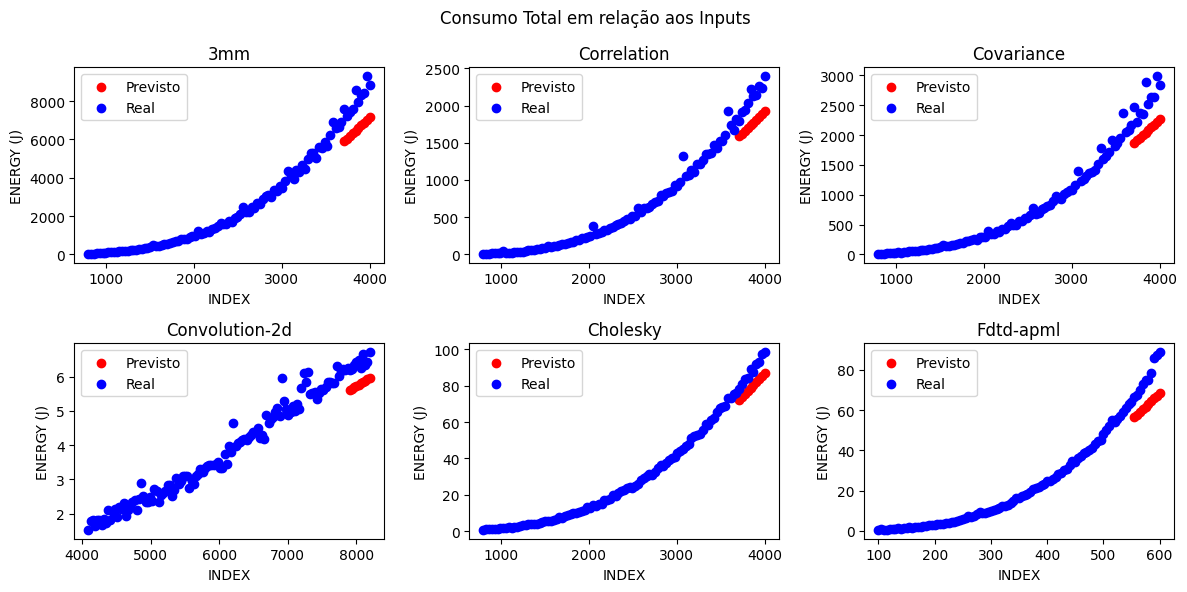

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Criação da figura e dos subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Consumo Total em relação aos Inputs')

# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    # Carregar o dataframe com os dados do benchmark
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)
    df['ENERGY'] = df['CPU'] + df['DRAM'] 
    
    X_train = df[['INPUT']][:60]
    y_train_ENERGY = df['ENERGY'][:60]

    #o grau do polinômio
    grau = 2
    poly_features = PolynomialFeatures(degree=grau)
    X_train_poly = poly_features.fit_transform(X_train)

    regression_ENERGY = LinearRegression()
    regression_ENERGY.fit(X_train_poly, y_train_ENERGY)

    X_inputs = df[['INPUT']][-10:]
    X_inputs_poly = poly_features.transform(X_inputs)
    y_pred_ENERGY = regression_ENERGY.predict(X_inputs_poly)

    # Definir as posições dos subplots
    row = i // 3
    col = i % 3

    # Plotar o gráfico de previsão do consumo de energia
    axs[row, col].scatter(X_inputs['INPUT'], y_pred_ENERGY, color='red', label='Previsto')
    axs[row, col].scatter(df['INPUT'], df['ENERGY'], color='blue', label='Real')
    axs[row, col].set_title(nome_benchmark)
    axs[row, col].set_xlabel('INDEX')
    axs[row, col].set_ylabel('ENERGY (J)')
    axs[row, col].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Exibir a figura
plt.tight_layout()
plt.show()

CPU     81.782804
DRAM    18.217196
dtype: float64
CPU     84.278448
DRAM    15.721552
dtype: float64
CPU     79.379351
DRAM    20.620649
dtype: float64
CPU     93.583651
DRAM     6.416349
dtype: float64
CPU     86.620277
DRAM    13.379723
dtype: float64
CPU     92.708083
DRAM     7.291917
dtype: float64


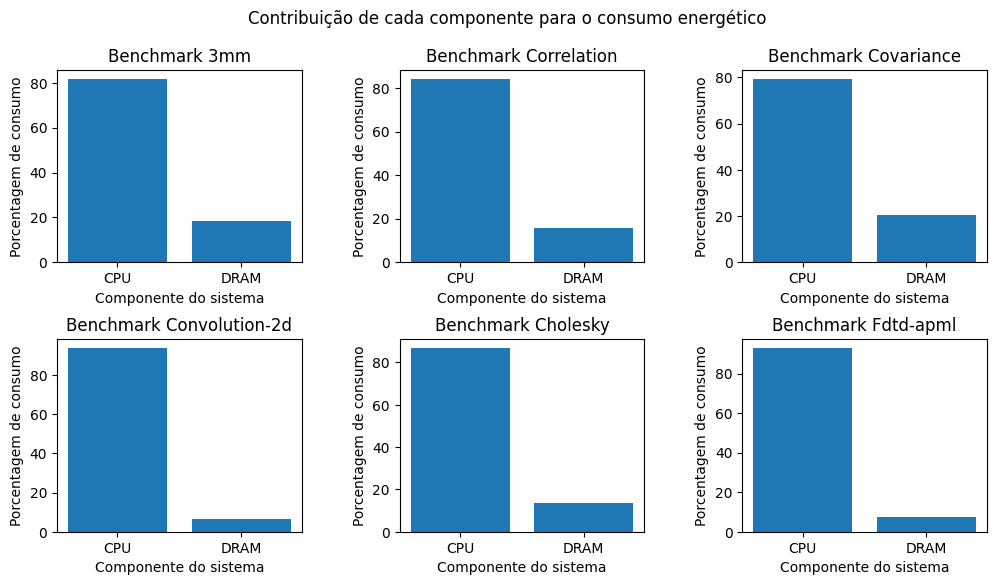

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Criação da figura e dos subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Contribuição de cada componente para o consumo energético')

# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    # Carregar o dataframe com os dados do benchmark
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)
    # Calcular a soma do consumo energético por componente
    total_energy = df[['CPU', 'DRAM']].sum()

    # Calcular a porcentagem de contribuição de cada componente
    percentage_energy = (total_energy / total_energy.sum()) * 100
    print( percentage_energy)

    # Definir as posições dos subplots
    row = i // 3
    col = i % 3

    # Plotar o gráfico de barras na posição correta
    axs[row, col].bar(percentage_energy.index, percentage_energy)
    axs[row, col].set_xlabel('Componente do sistema')
    axs[row, col].set_ylabel('Porcentagem de consumo')
    axs[row, col].set_title(f'Benchmark {nome_benchmark}')

# Ajustar espaçamento entre os subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Exibir a figura
plt.show()

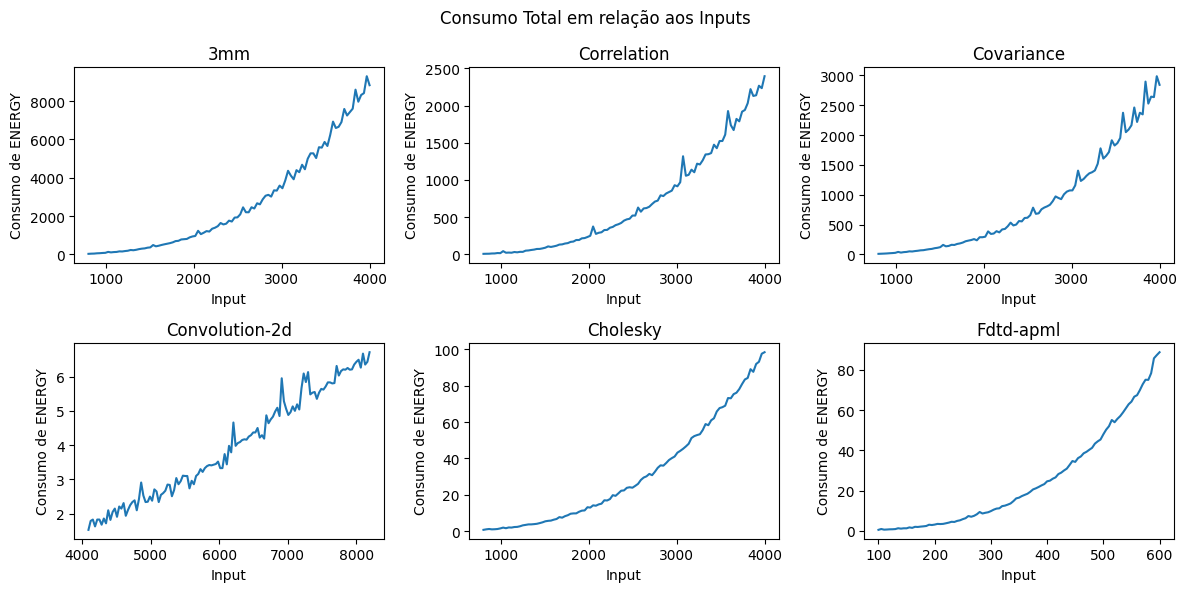

In [15]:
# Criação da figura e dos subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Consumo Total em relação aos Inputs')

# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    # Carregar o dataframe com os dados do benchmark
    df = pd.read_csv(caminho_csv, sep=';')
    
    df = microjoule_to_joule(df)

    df['ENERGY'] = df['CPU'] + df['DRAM']
    
  

    df_mean = df.groupby('INPUT')['ENERGY'].mean()

 # Definir as posições dos subplots
    row = i // 3
    col = i % 3

    # Plotar o consumo de CPU em relação aos inputs
    axs[row, col].plot(df_mean.index, df_mean)
    axs[row, col].set_title(nome_benchmark)
    axs[row, col].set_xlabel('Input')
    axs[row, col].set_ylabel('Consumo de ENERGY')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Exibir a figura
plt.tight_layout()
plt.show()

In [18]:
caminhos_csv = ['../data/output/output_2mm.csv',
                '../data/output/output_3mm.csv',
                '../data/output/output_correlation.csv',
                '../data/output/output_covariance.csv',
                '../data/output/output_cholesky.csv',
                '../data/output/output_gemm.csv',
                '../data/output/output_syrk.csv',
                '../data/output/output_syr2k.csv',
                '../data/output/output_symm.csv',
                '../data/output/output_trmm.csv',
                '../data/output/output_gramscmidt.csv',
                '../data/output/output_lu.csv']
nomes_benchmarks = ['2mm', '3mm', 'Correlation', 'Covariance','Cholesky',
                    'Gemm', 'Syrk', 'Syr2k', 'Symm', 'Trmm',
                    'Gramscmidt', 'LU']

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dados_juntos = pd.DataFrame()

# Iterar sobre cada caminho de arquivo CSV
for caminho, nome_benchmark in zip(caminhos_csv, nomes_benchmarks):
    # Ler os dados do arquivo CSV
    dados = pd.read_csv(caminho, sep=';')
    dados = dados.drop(columns=["EXIT_CODE","PSYS","CORE","UNCORE"])
    
    # Adicionar uma nova coluna com o nome do benchmark
   
    # Concatenar os dados no DataFrame principal
    dados_juntos = pd.concat([dados_juntos, dados], ignore_index=True)
    
    dados_juntos
    
dados_juntos.head()
# Agora, 'dados_juntos' contém todos os dados concatenados com uma coluna adicional indicando o benchmark

,CPU,DRAM,DURATION,INPUT
0,17551652,1523312,1308673,800
1,22983828,1807125,1694991,832
2,26687493,2504144,1908259,864
3,34731234,3489249,2388988,896
4,37755091,3431998,2717230,928


<Axes: >

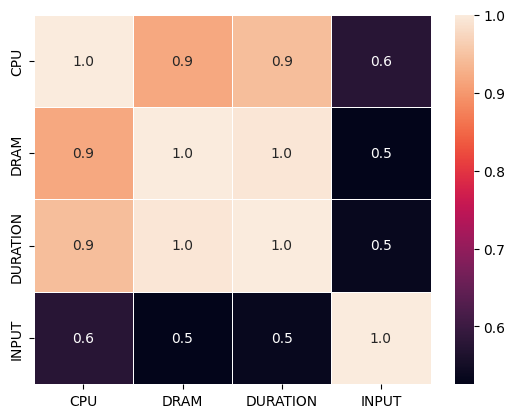

In [20]:
import pandas as pd
import seaborn as sn

correlation = dados_juntos.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

ValueError: could not convert string to float: '15570944;17551652;1523312;1308673;6075729;36316;0;800'